# Chapter 1 -  FROM ORDINARY (CRISP) SETS TO FUZZY SETS : A GRAND PARADIGM SHIFT

Klir, G.J., Yuan, B., 1995. **Fuzzy sets and fuzzy logic: theory and applications**. Prentice Hall PTR, Upper Saddle River, N.J.

## Loading packages

In [1]:
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

# Aliases
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
import skfuzzy as fuzz
import pandas as pd
import seaborn as sns

# Specifics imports
## Sympy
from sympy import Eq, solve, solveset, Symbol, symbols, Function, pprint
from sympy import Interval, S, Union
from sympy import Min, Max
from sympy.plotting import plot, plot_implicit

## skfuzz
from skfuzzy import control as ctrl

/home/gpetrini/.local/lib/python3.6/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Exercises

### 1.9 

Order the fuzzy sets defined by the following membership grade functions (assuming $x\geq 0$) by the inclusion (subset) relation:

$$
A(x) = \frac{1}{1+10x}\,\, , \, B(x) = \left(\frac{1}{1+10x}\right)^{\frac{1}{2}}\,\, , \, C(x) = \left(\frac{1}{1+10x}\right)^{2}
$$


In [2]:
x = sp.Symbol('x')

A = 1/(1+10*x)
pprint(Eq(Function('A')(x), A))

B = (1/(1+10*x))**(1/2)
pprint(Eq(Function('B')(x), B))

C = (1/(1+10*x))**(2)
pprint(Eq(Function('C')(x), C))

          1    
A(x) = ────────
       10⋅x + 1
                 0.5
       ⎛   1    ⎞   
B(x) = ⎜────────⎟   
       ⎝10⋅x + 1⎠   
            1     
C(x) = ───────────
                 2
       (10⋅x + 1) 


In [3]:
print("Sorting in a increasing order")
sp.FiniteSet(A,B,C).as_relational(x)

Sorting in a increasing order


Eq(x, (10*x + 1)**(-2)) | Eq(x, 1/(10*x + 1)) | Eq(x, (1/(10*x + 1))**0.5)

### 1.10

Consider the fuzzy sets A, B, and C defined on the interval $X = [0, 10]$ of real numbers by the membership grade functions

$$
A(x) = \frac{x}{x+2}\, , B(x) = 2^{-x}\, , C(x) = \frac{1}{1+10\cdot(x-2)^2}
$$

Determine mathematical formulas and graphs of the membership grade functions of each of
the following sets:

\begin{itemize}
    \item $\overline{A}, \overline{B}, \overline{C}$,
    \item $A \cup B, A \cup C, B \cup C$
    \item $A \cap B, A \cap C, B \cap C$
    \item $A \cup B \cup C, A \cap B \cap C$
    \item $A \cap \overline{C}, \overline{B \cap C}, \overline{A\cup C}$
\end{itemize}

In [4]:
A = x/(x+2)
B = 2**(-x)
C = 1/(1+10*(x-2)**2)

pprint(Eq(Function('A')(x), A))
pprint(Eq(Function('B')(x), B))
pprint(Eq(Function('C')(x), C))

         x  
A(x) = ─────
       x + 2
        -x
B(x) = 2  
              1       
C(x) = ───────────────
                 2    
       10⋅(x - 2)  + 1


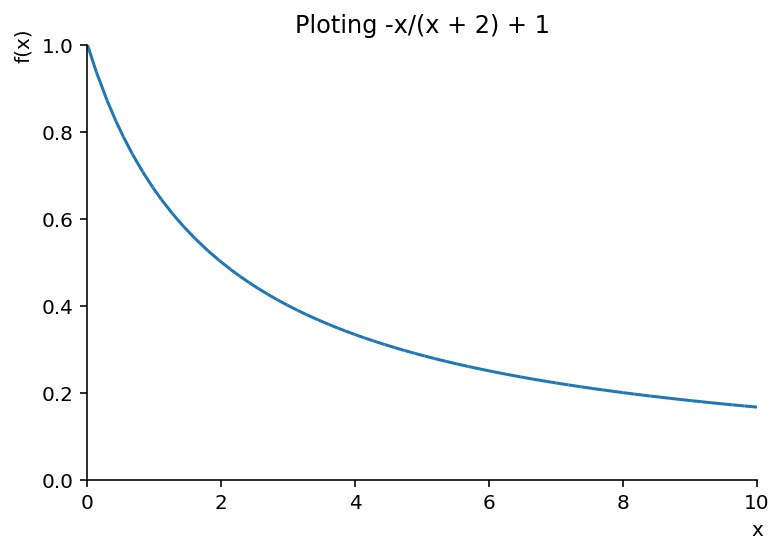

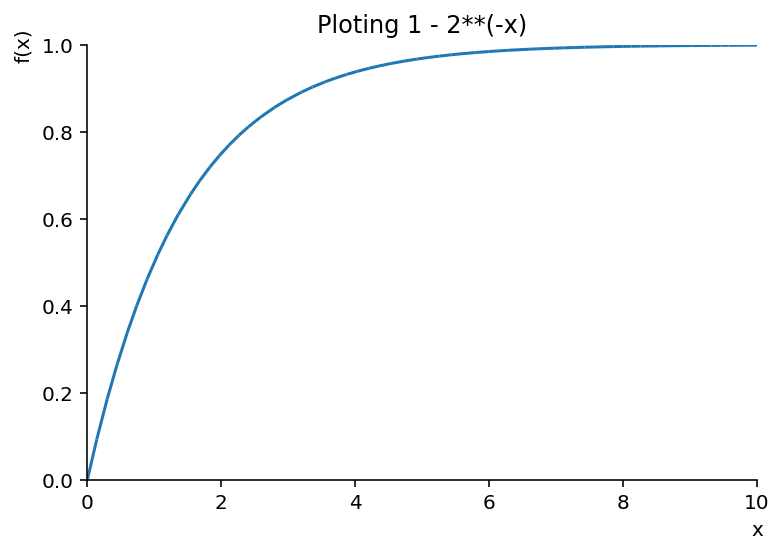

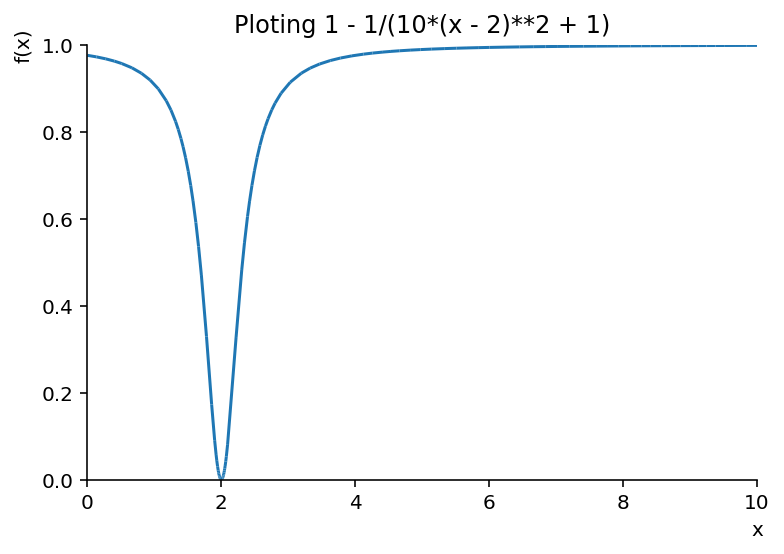

In [5]:
for Set in [A,B,C]:
    plot(
        1-Set, 
        (x,0,10), 
        title=f"Ploting {1-Set}", 
        show=True, 
        ylim=(0,1)
    )

In [6]:
def plot_union(set1,set2):
    p = plot(
        Min(set1,set2),
        (x,0,10),
        ylim=(0,1),
        show=True, 
        title=f"${set1} \cup {set2}$"
    )
    plt.show()
    return p

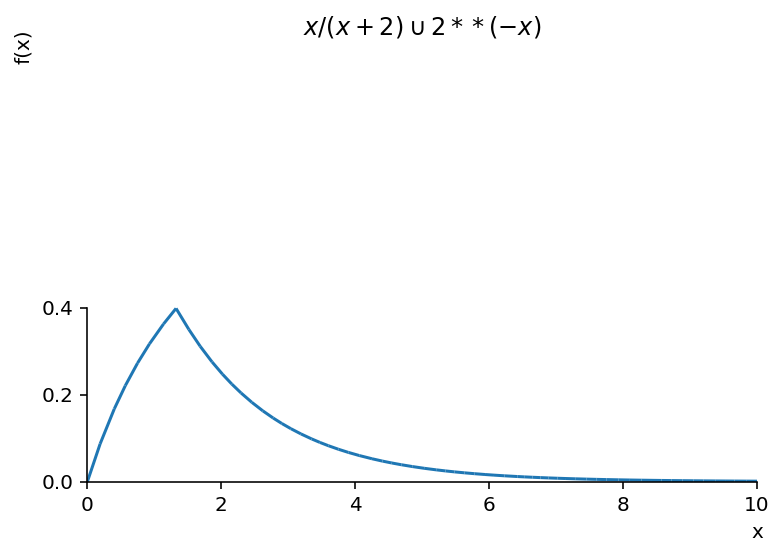

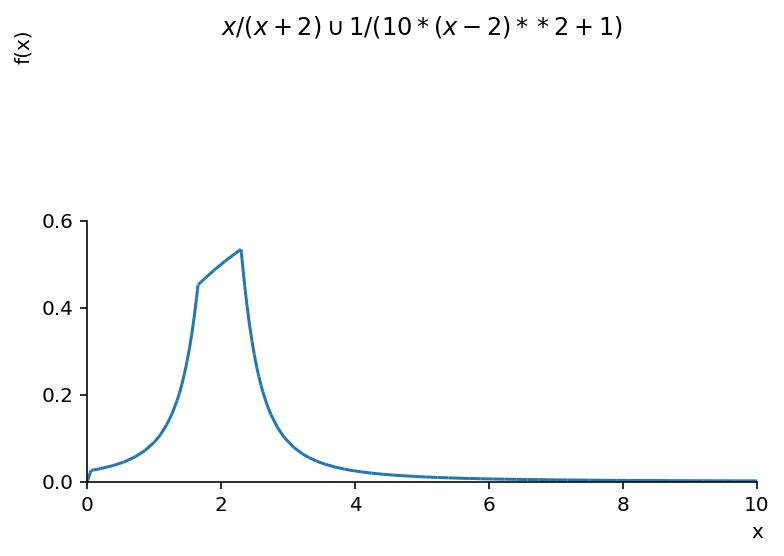

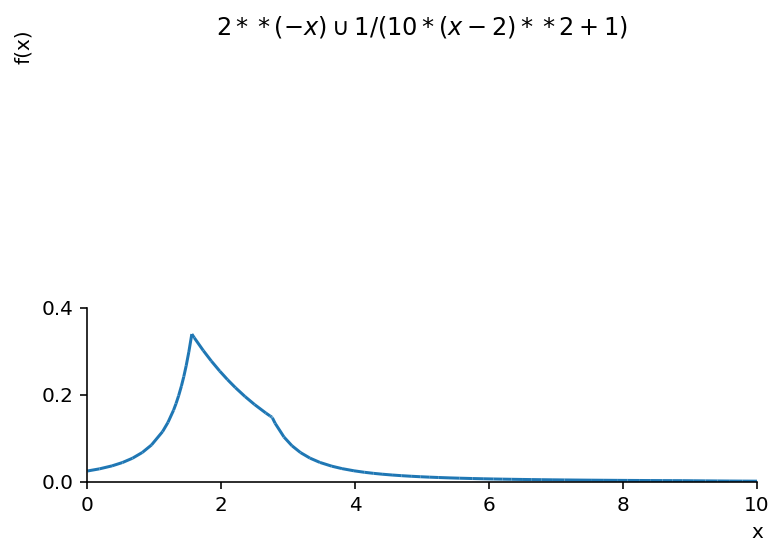

In [7]:
plot_union(A,B)
plot_union(A,C)
plot_union(B,C)

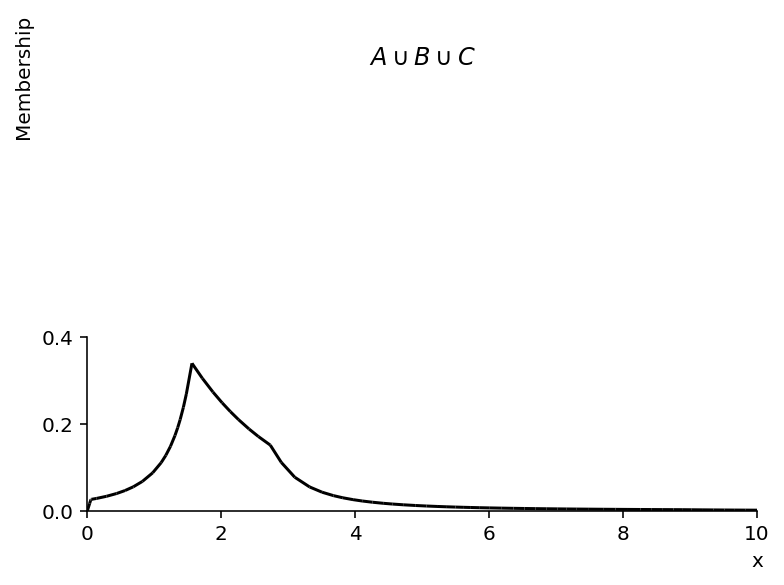

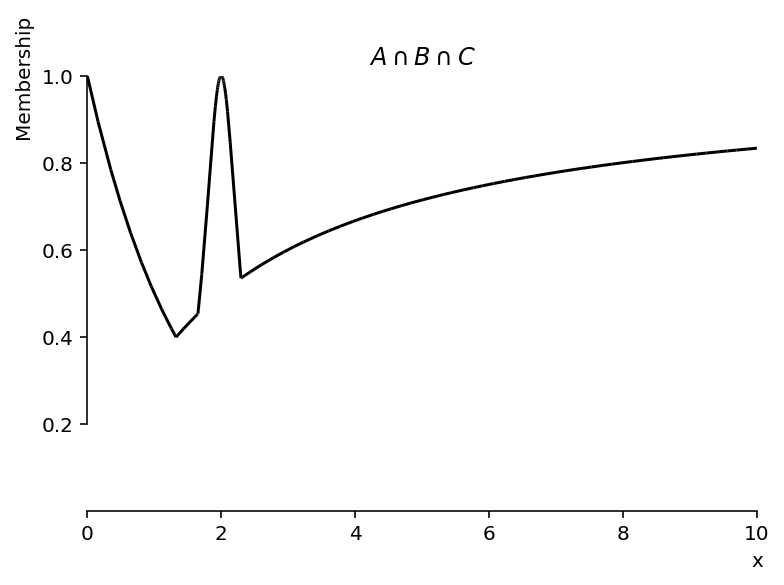

In [8]:
plot(
    Min(A,B, C),
    (x,0,10),
    ylim=(0,1),
    show=True, 
    xlabel="x",
    ylabel="Membership",
    title = "$A \cup B \cup C$",
    line_color='black'
)
plt.show()

plot(
    Max(A,B, C),
    (x,0,10),
    ylim=(0,1),
    show=True, 
    xlabel="x",
    ylabel="Membership",
    title = "$A \cap B \cap C$",
    line_color='black'
)
plt.show()

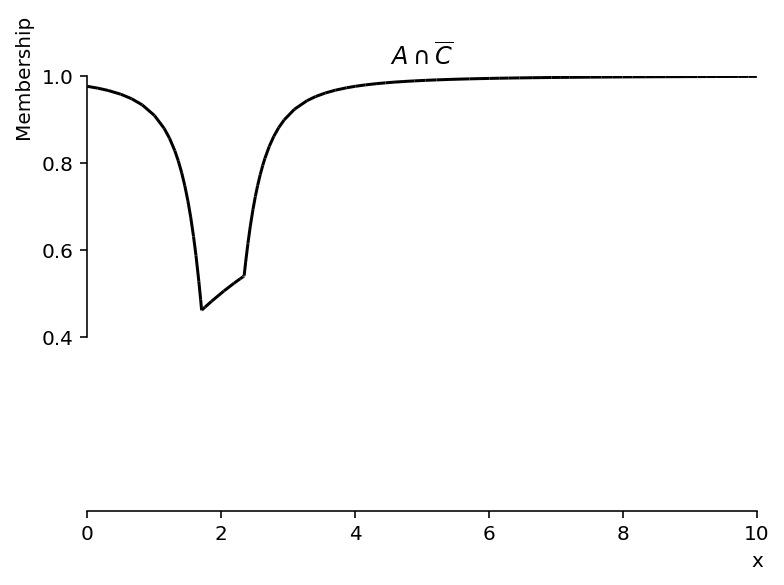

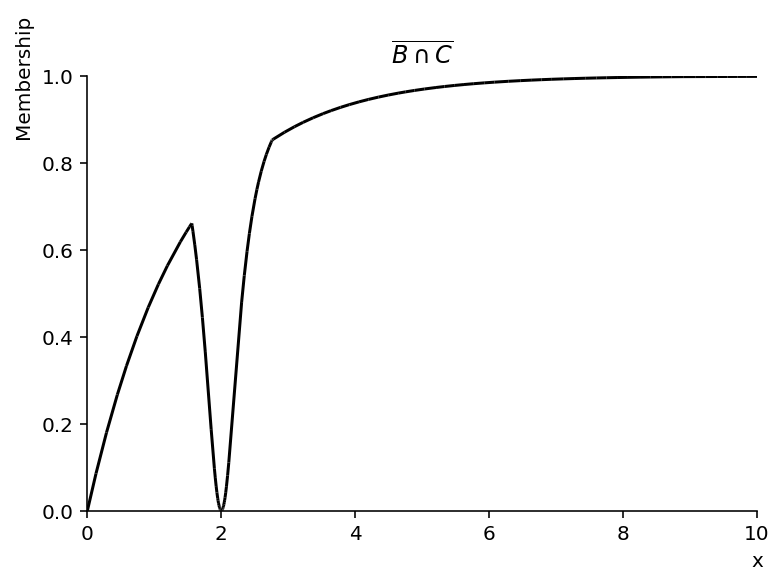

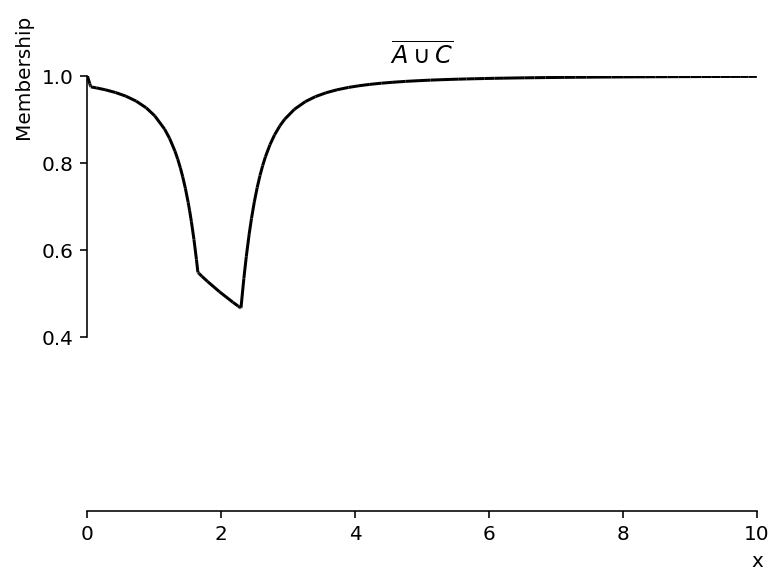

In [9]:
plot(
    Max(A,(1-C)),
    (x,0,10),
    ylim=(0,1),
    show=True, 
    xlabel="x",
    ylabel="Membership",
    title = "$A \cap \overline{C}$",
    line_color='black'
)
plt.show()

plot(
    (1-Max(B,C)),
    (x,0,10),
    ylim=(0,1),
    show=True, 
    xlabel="x",
    ylabel="Membership",
    title = "$\overline{B\cap C}$",
    line_color='black'
)
plt.show()

plot(
    (1-Min(A,C)),
    (x,0,10),
    ylim=(0,1),
    show=True, 
    xlabel="x",
    ylabel="Membership",
    title = "$\overline{A\cup C}$",
    line_color='black'
)
plt.show()

### 1.11

Calculate the $\alpha$-cuts and strong $\alpha$-cuts of the three fuzzy sets in Exercise 1.10 for some values
of a, for example, $\alpha$ = 0.2, 0.5, 0.8, 1.


#### Definitions

Consider a set A

$\alpha$-cuts: $\lbrace x|A(x) \geq \alpha \rbrace$

strong $\alpha$-cuts: $\lbrace x|A(x) > \alpha \rbrace$


In [10]:
alphas = [0.2, 0.5, 0.8, 1.0]
conditions = {
    "a" : [1-A, 1-B, 1-C],
    'b' : [Min(A,B), Min(A,C), Min(B,C)],
    'c' : [Max(A,B), Max(A,C), Max(B,C)],
    'd' : [Min(A,B,C), Max(A,B,C)],
    'e' : [Max(A, (1-C)), 1-(Max(B,C)), 1-(Min(A,C))]
}

def cuts(condition, var=x, alpha=0.2):
    lenght = np.linspace(0,10,1001)
    df = pd.DataFrame(
        {
            "Full set" : [(condition).subs(var,i) for i in lenght],
            "$\\alpha$- cut" : [(condition).subs(var,i) if (condition).subs(var,i) >= alpha else np.nan          
                     for i in lenght]
        }, 
        dtype=float, 
        index = lenght, 
    )
    
    fig, ax = plt.subplots(1,1)
    df.plot(ax=ax, legend=True, title = f"$\\alpha$-cut = {alpha} at {condition}")
    sns.despine()
    plt.show()
        

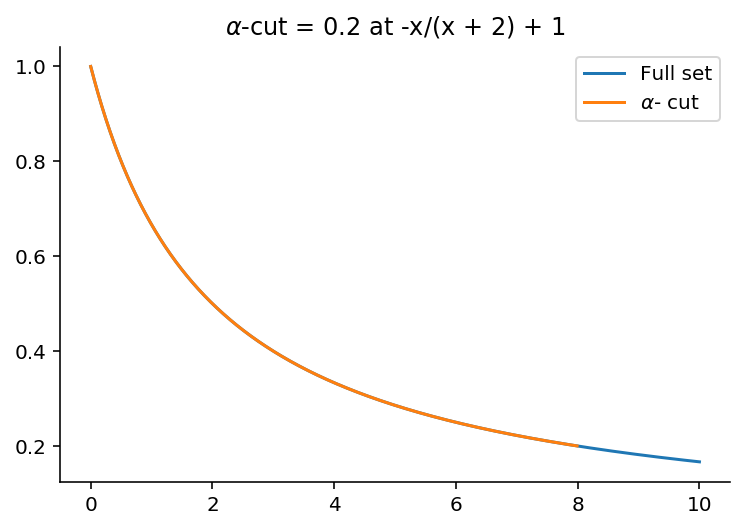

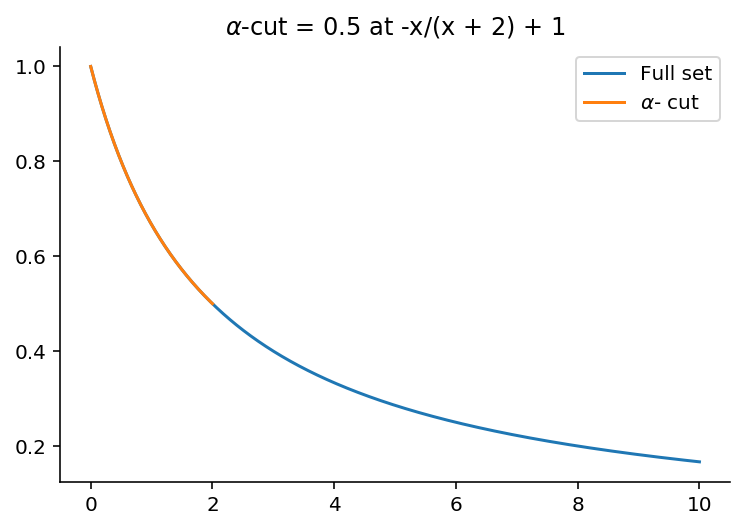

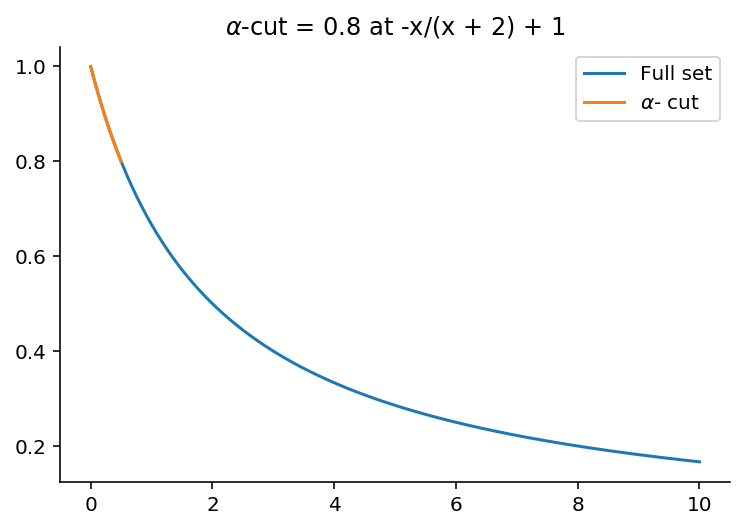

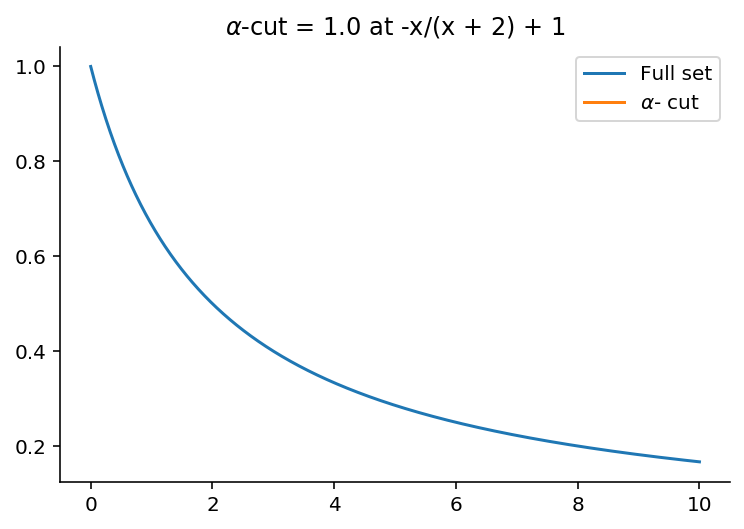

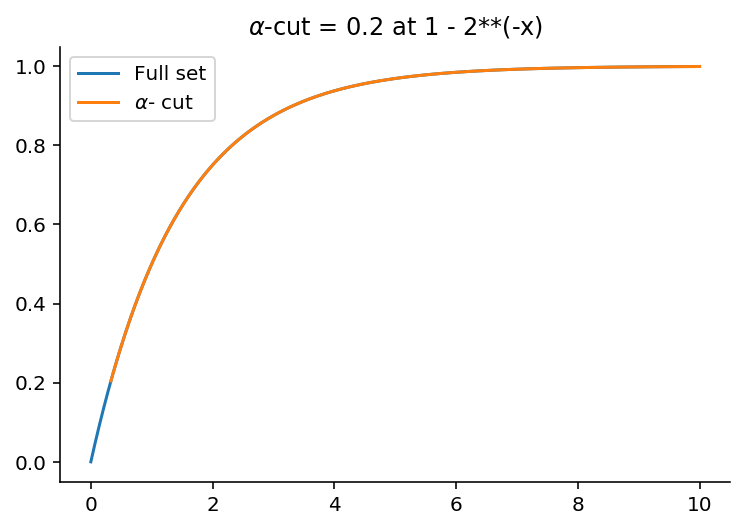

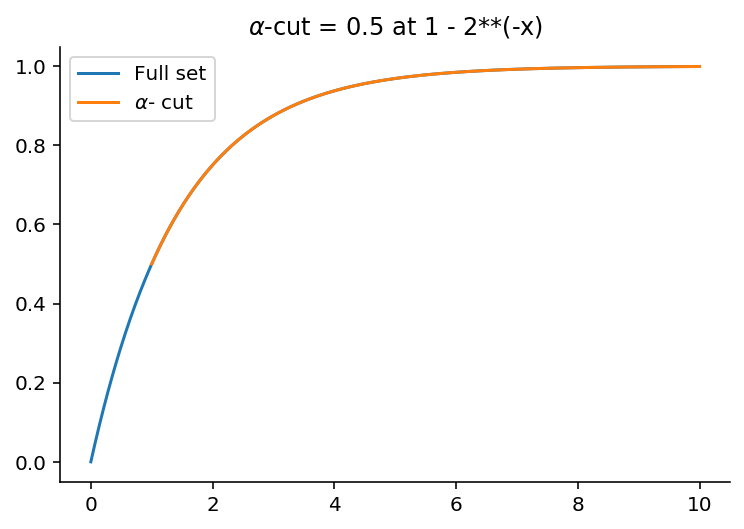

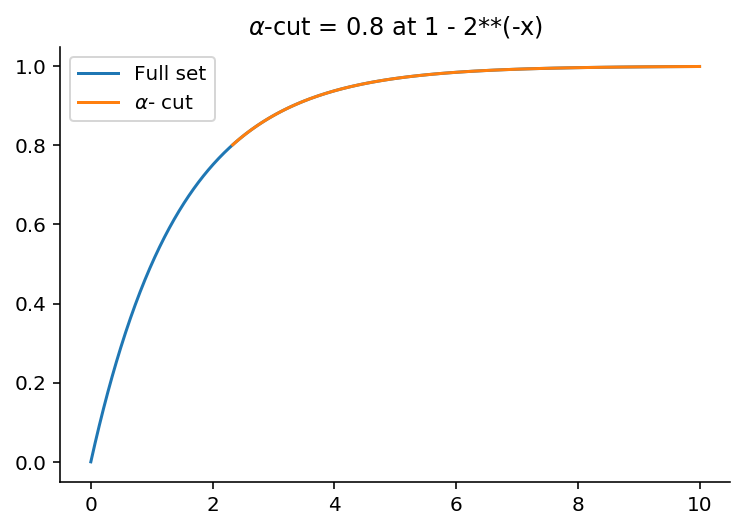

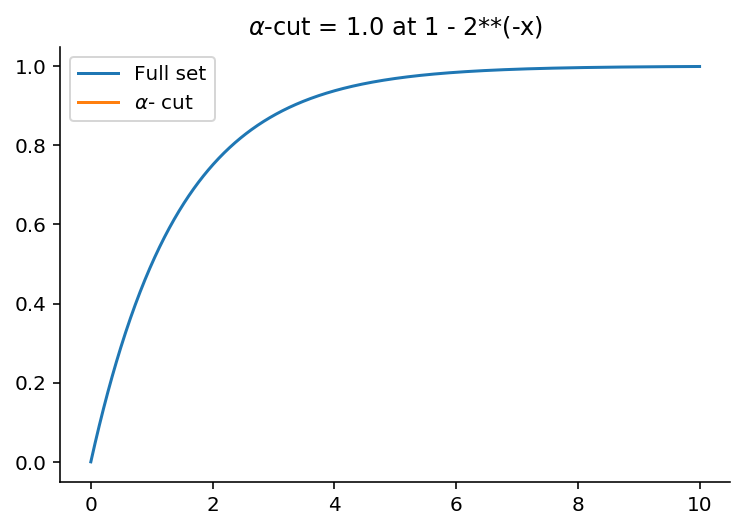

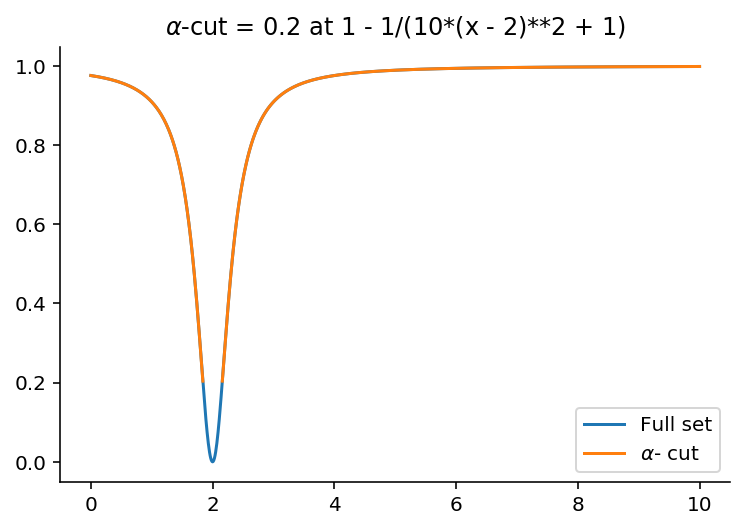

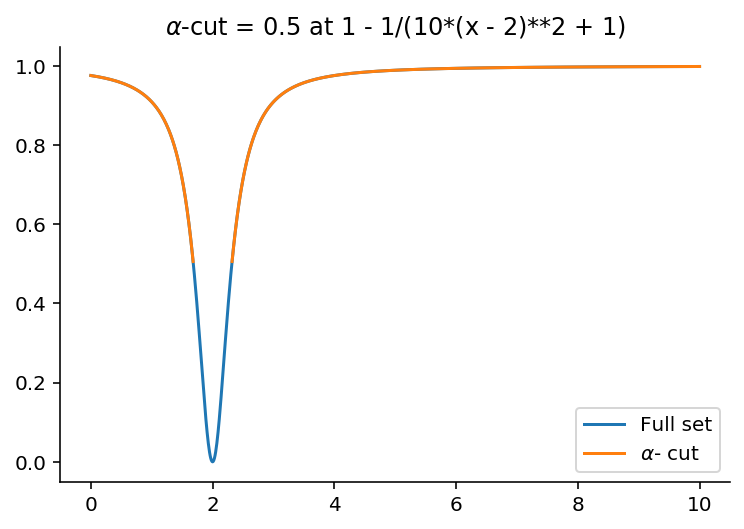

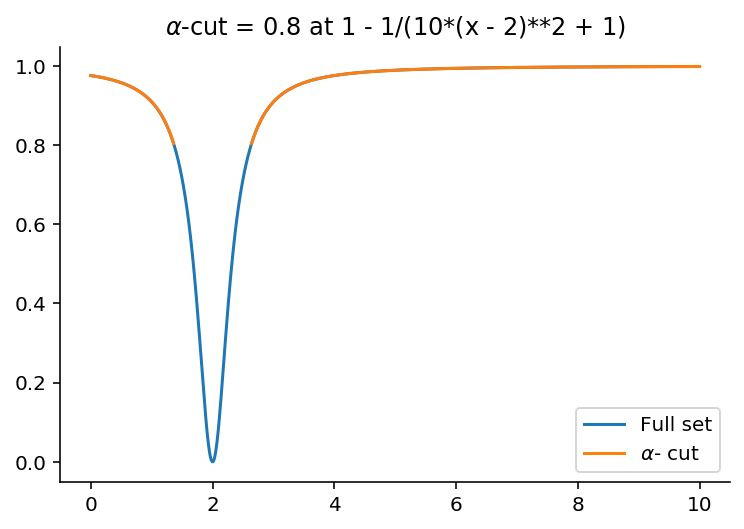

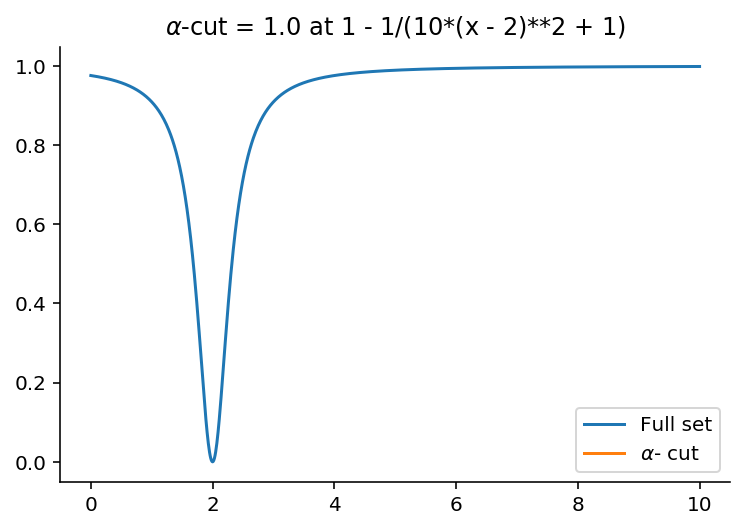

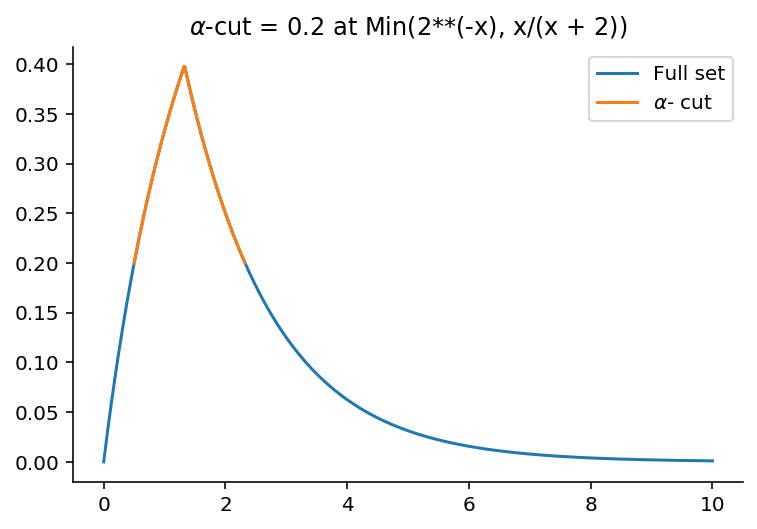

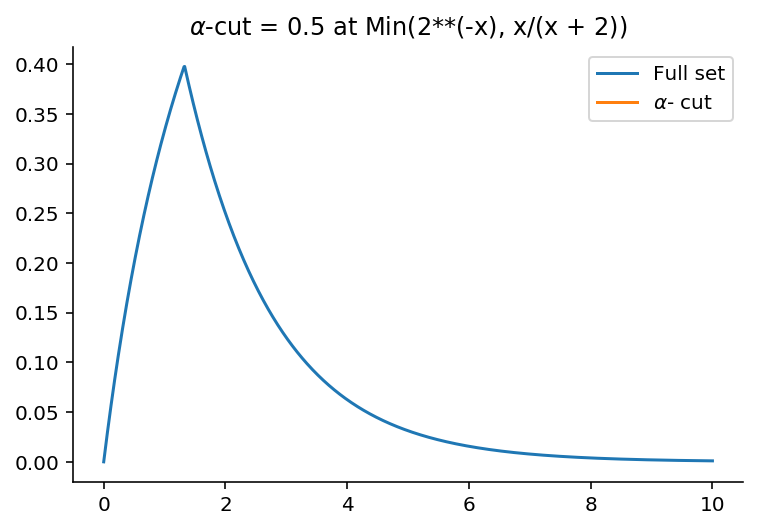

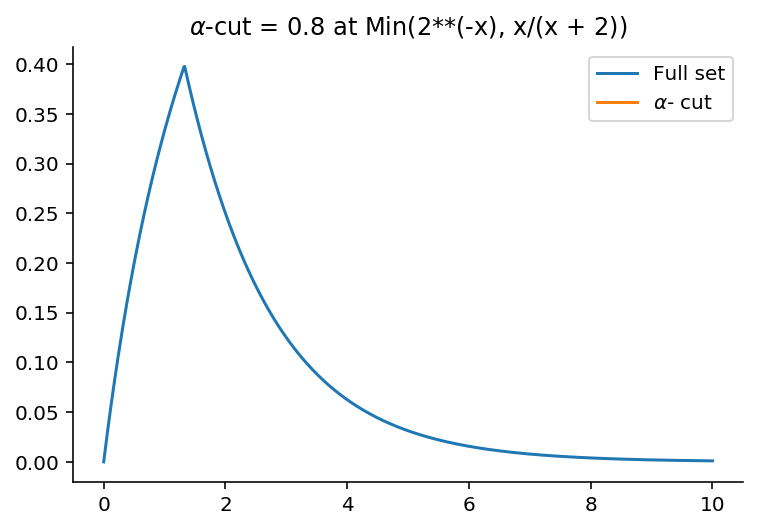

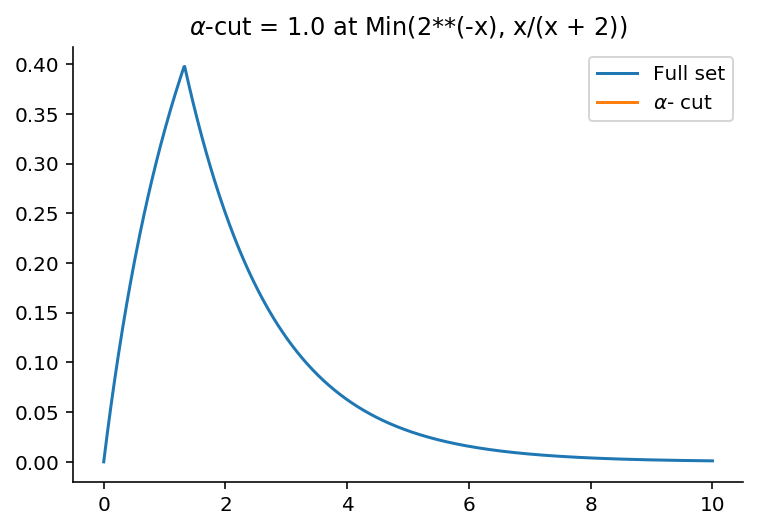

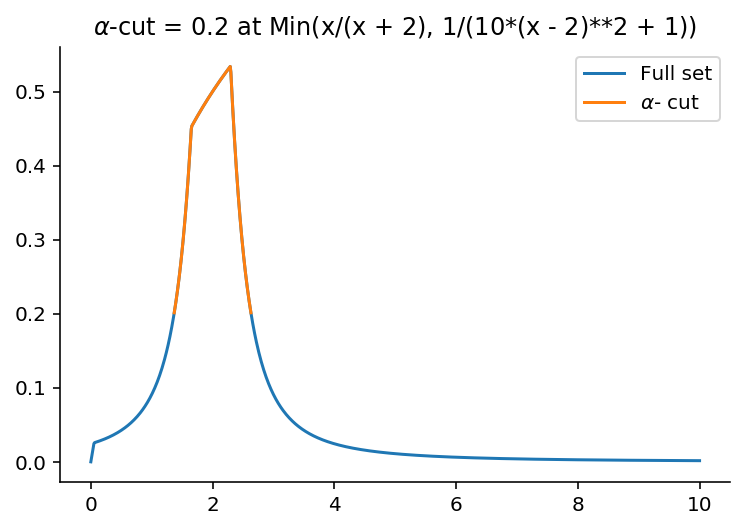

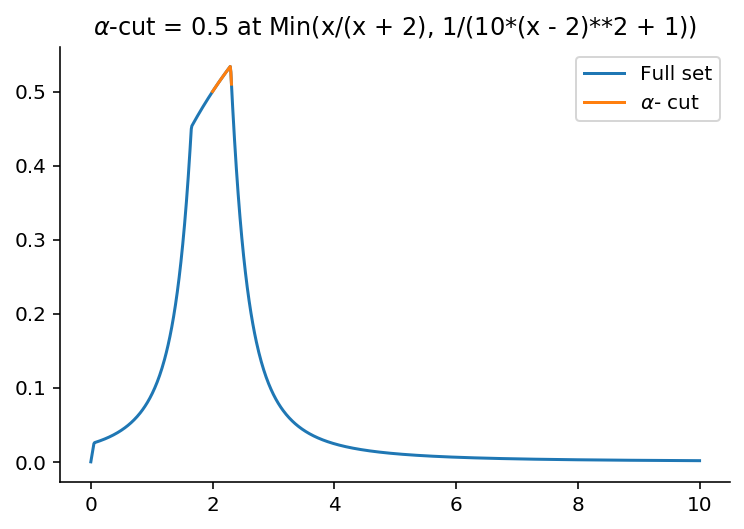

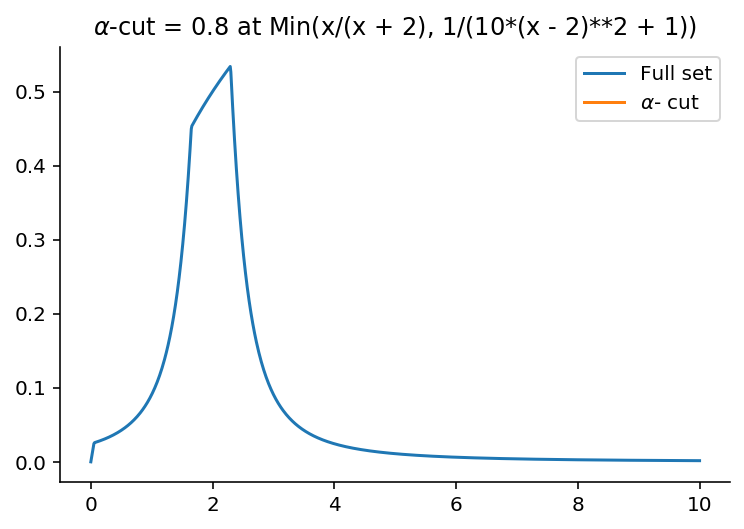

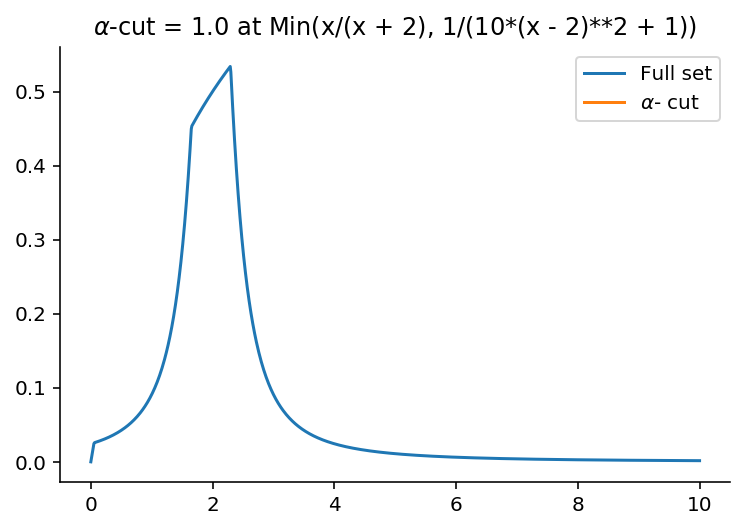

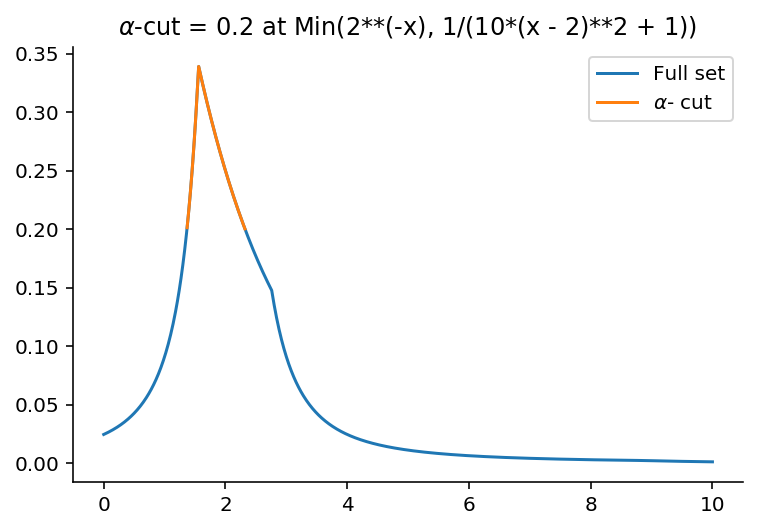

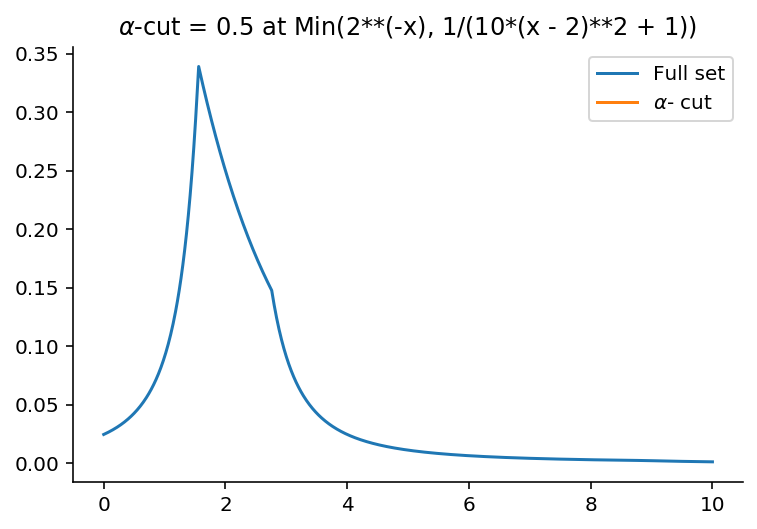

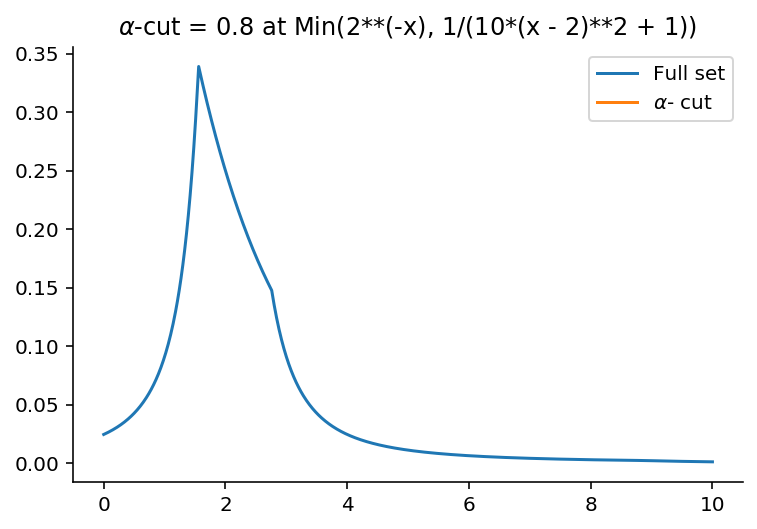

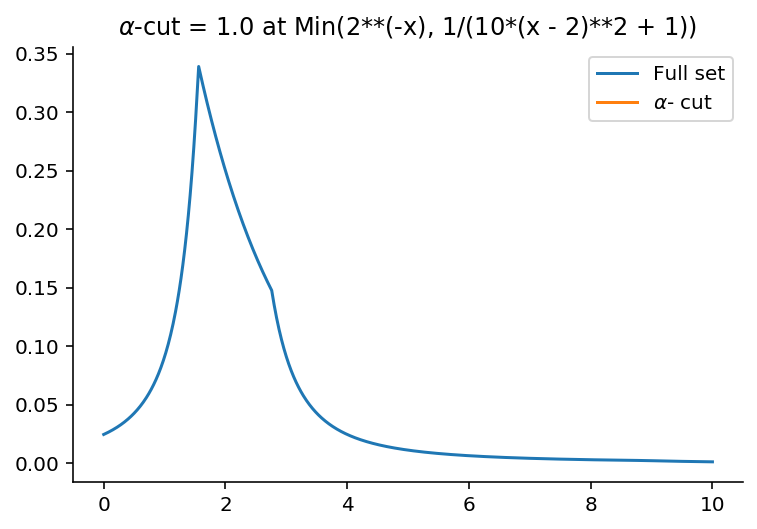

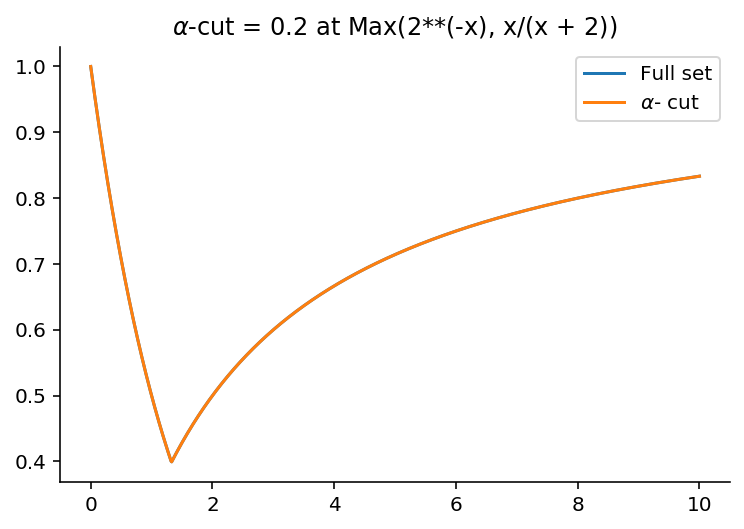

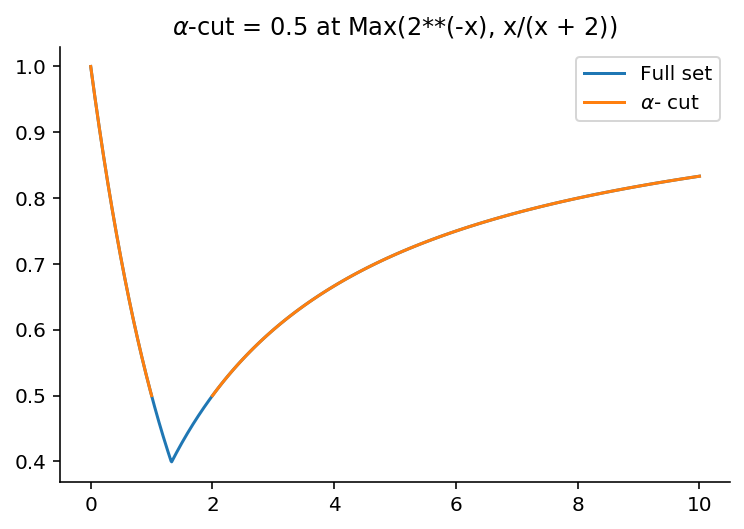

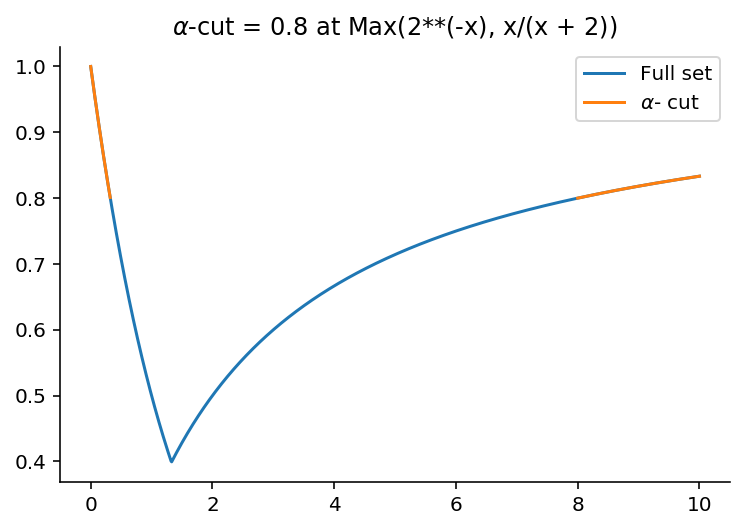

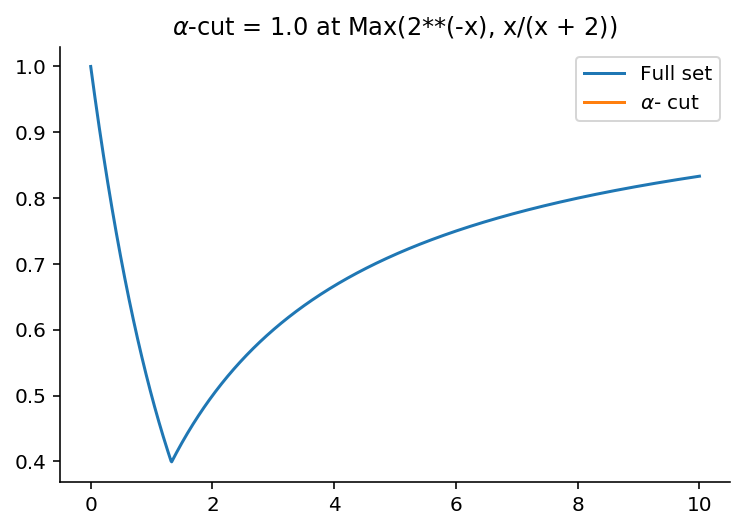

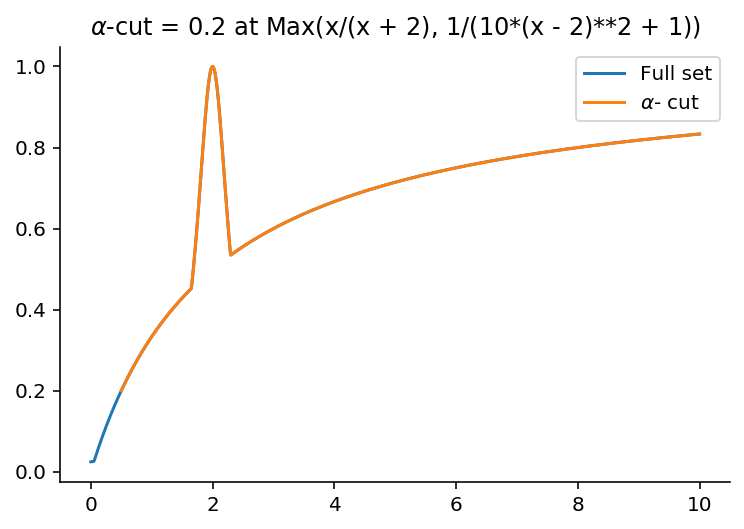

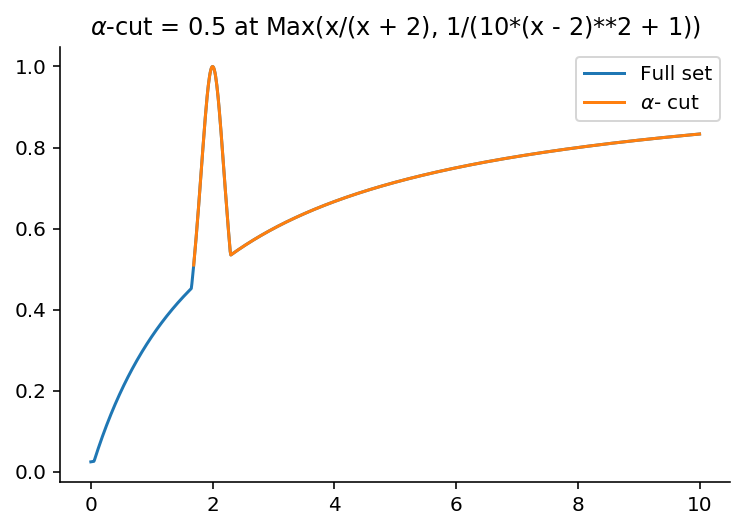

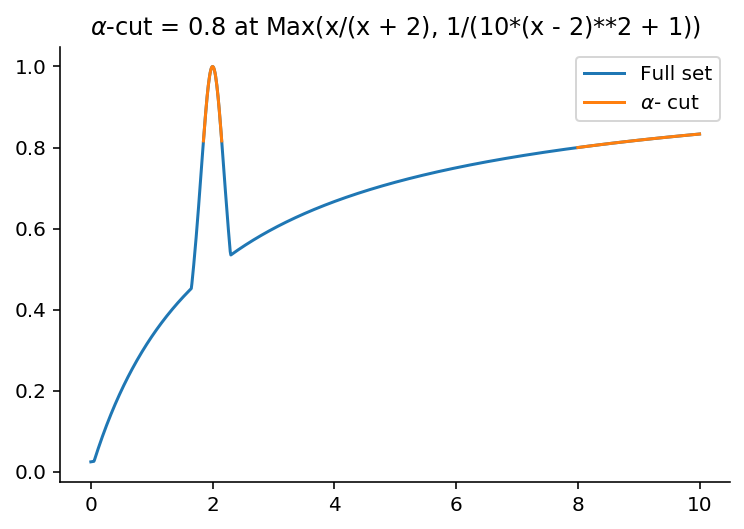

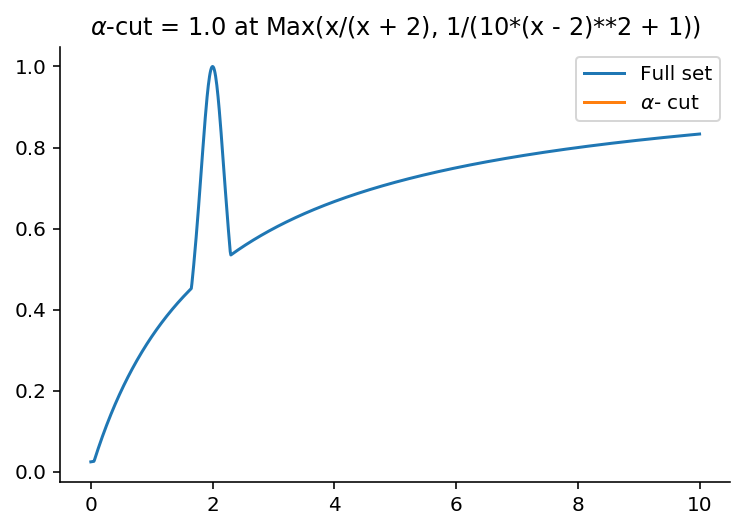

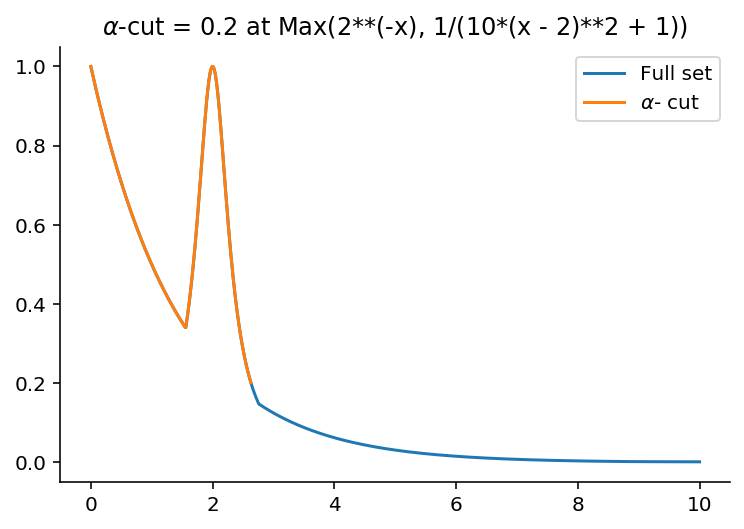

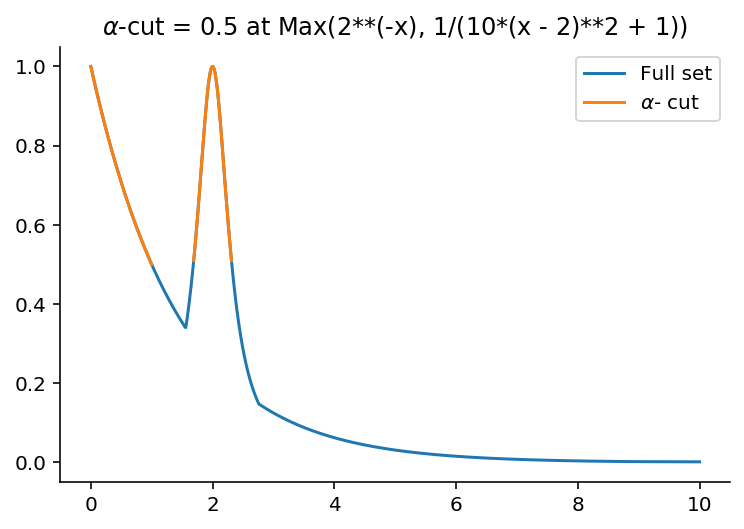

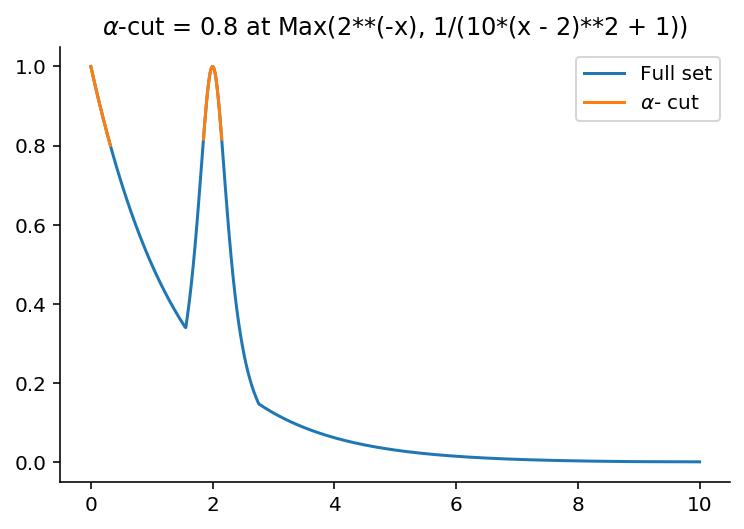

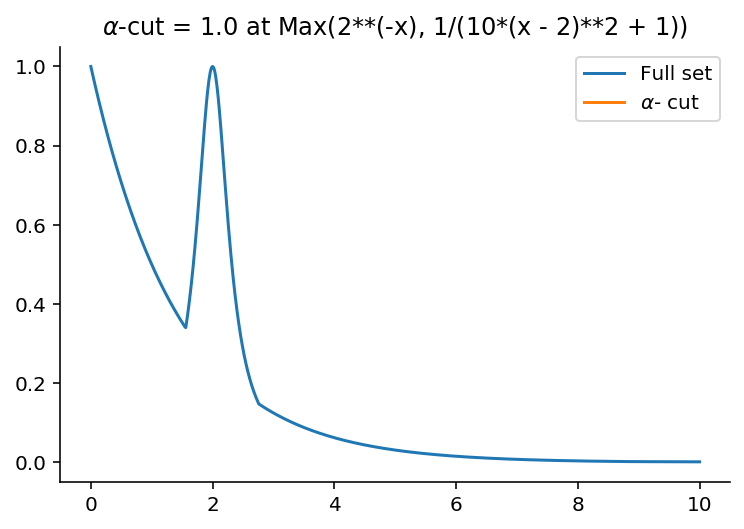

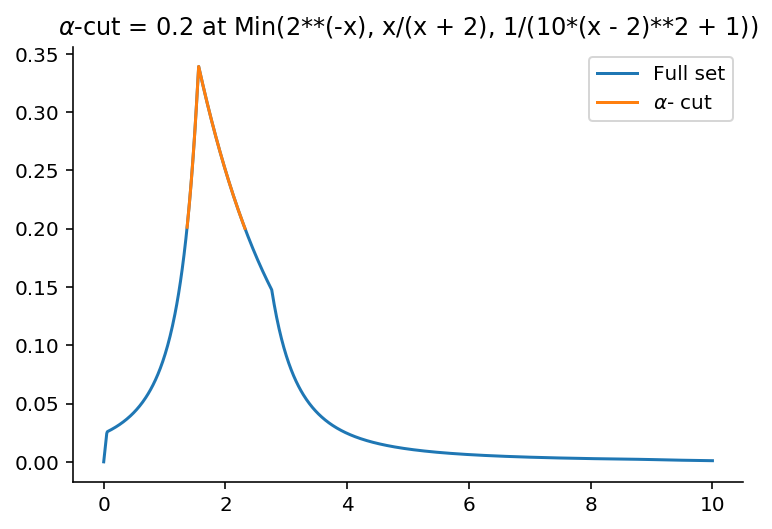

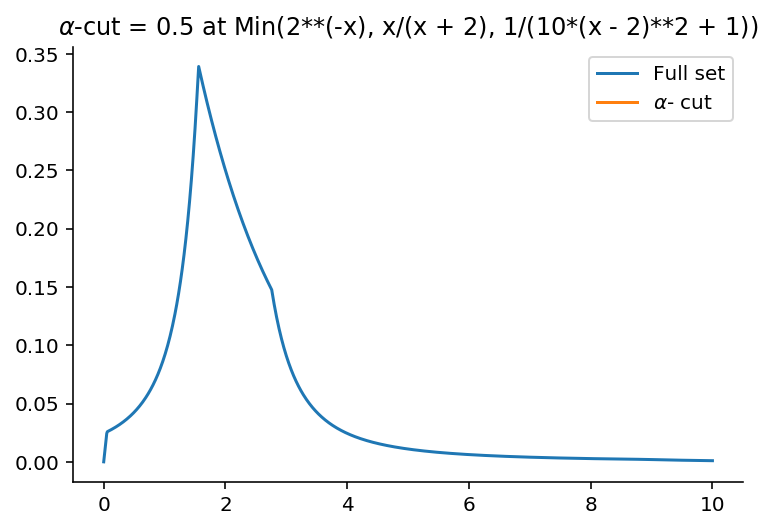

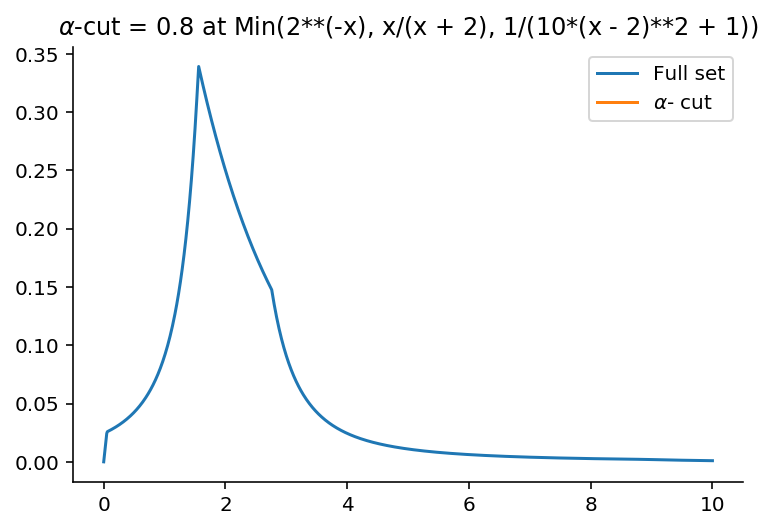

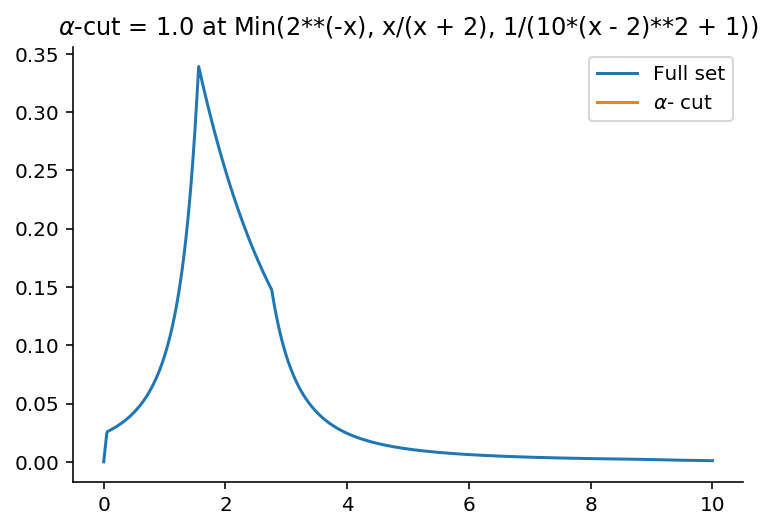

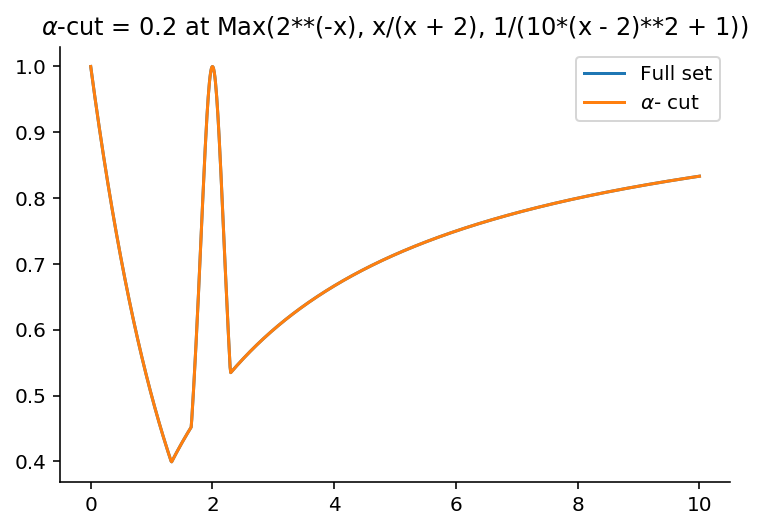

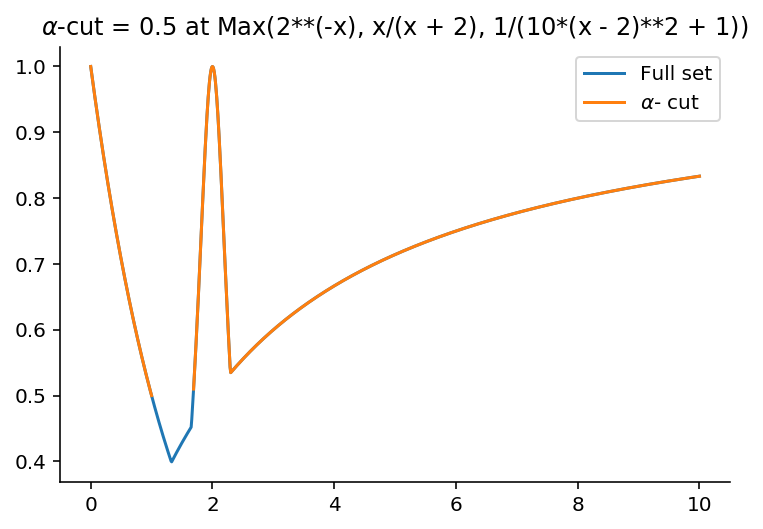

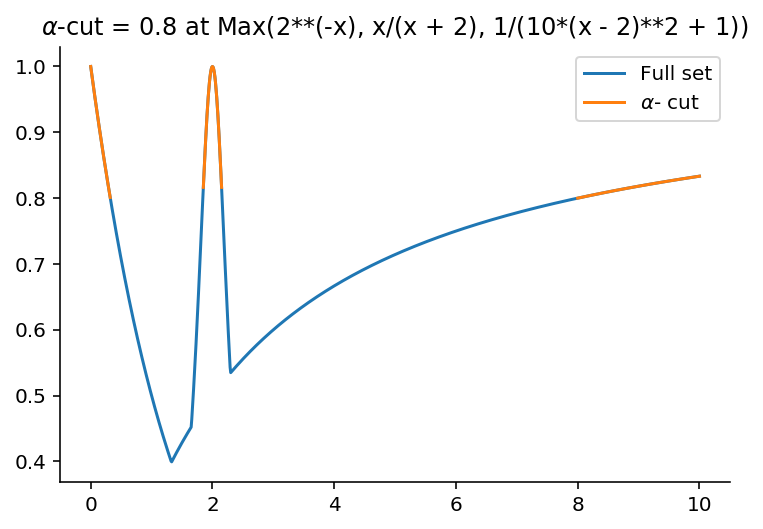

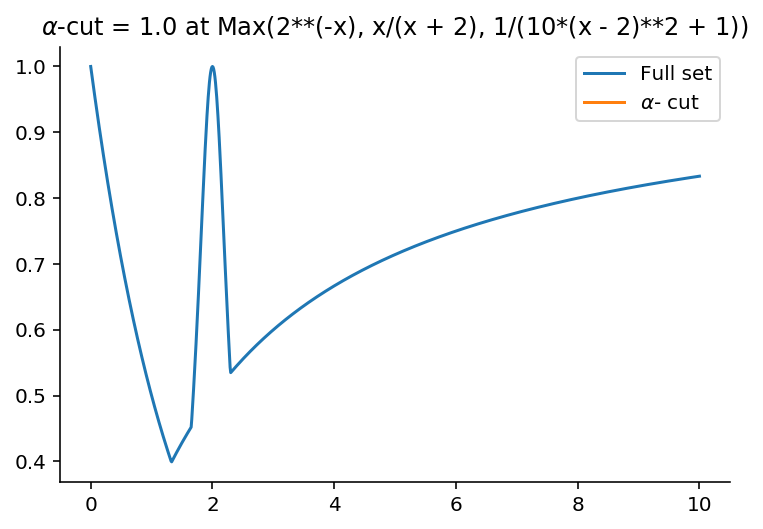

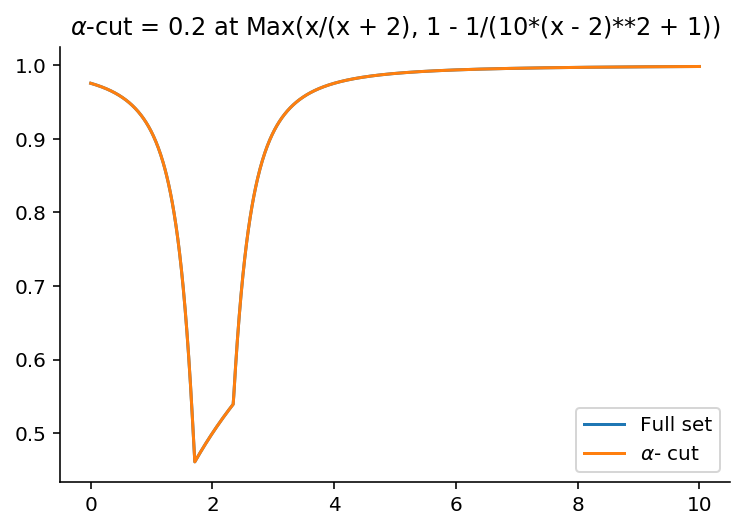

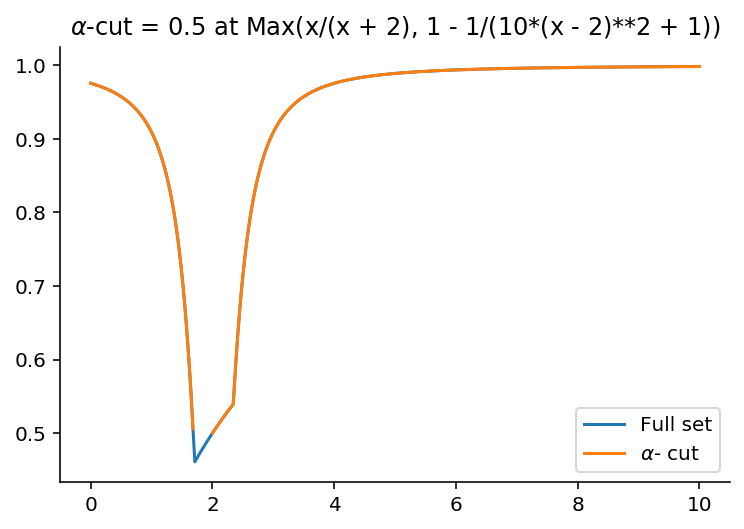

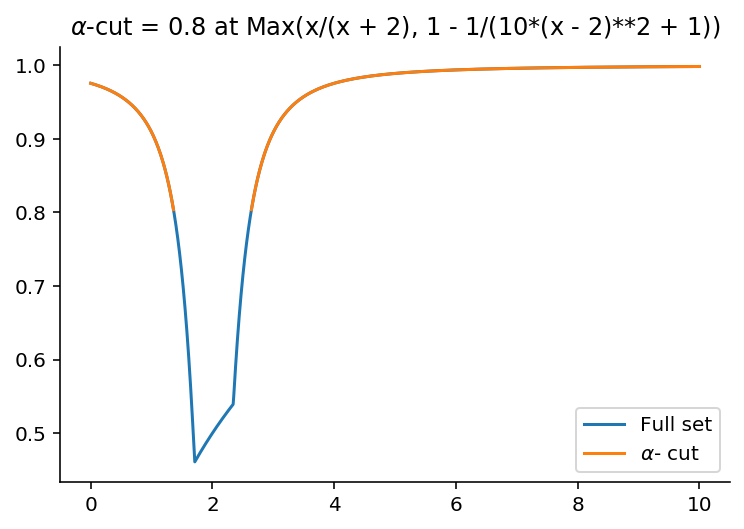

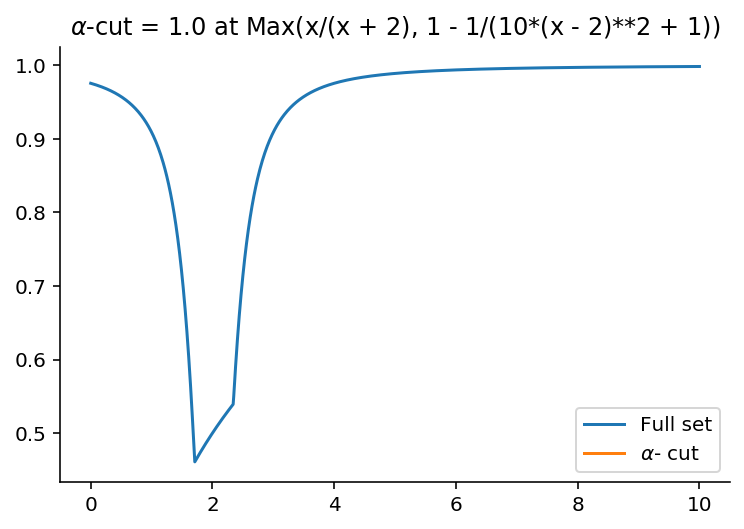

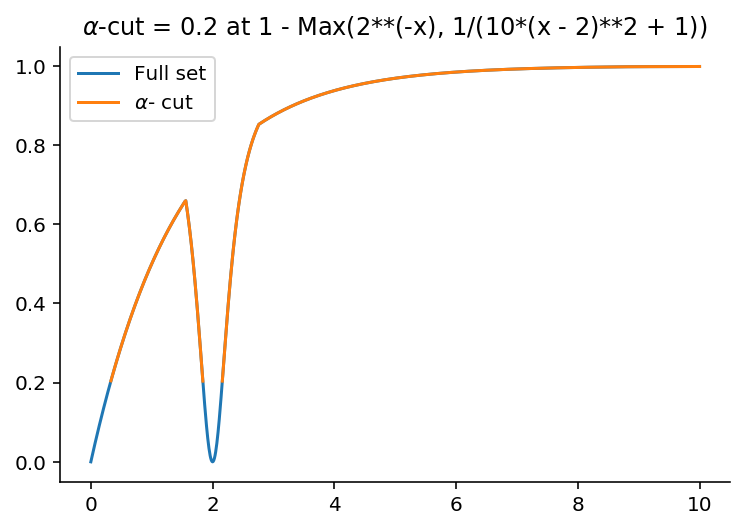

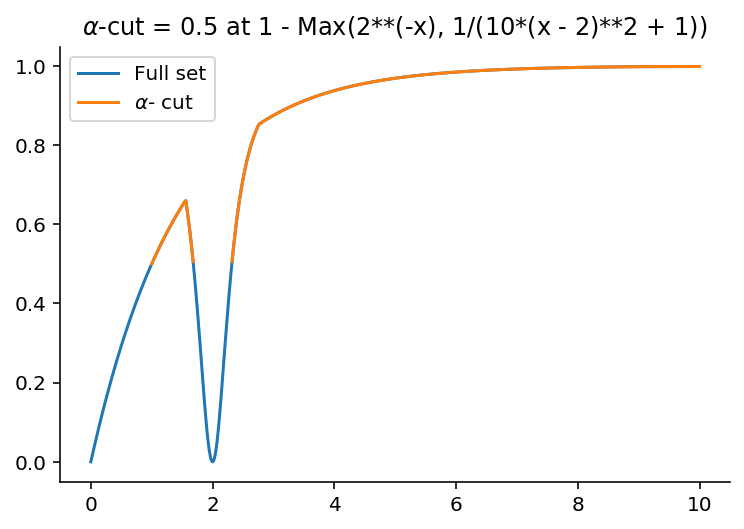

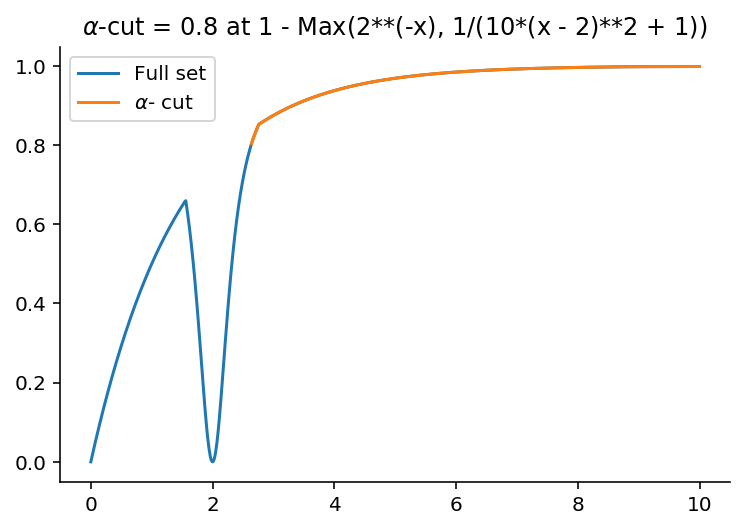

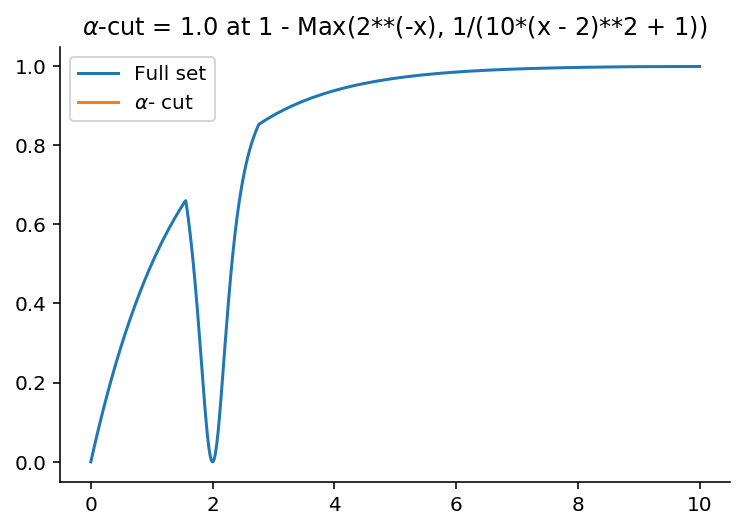

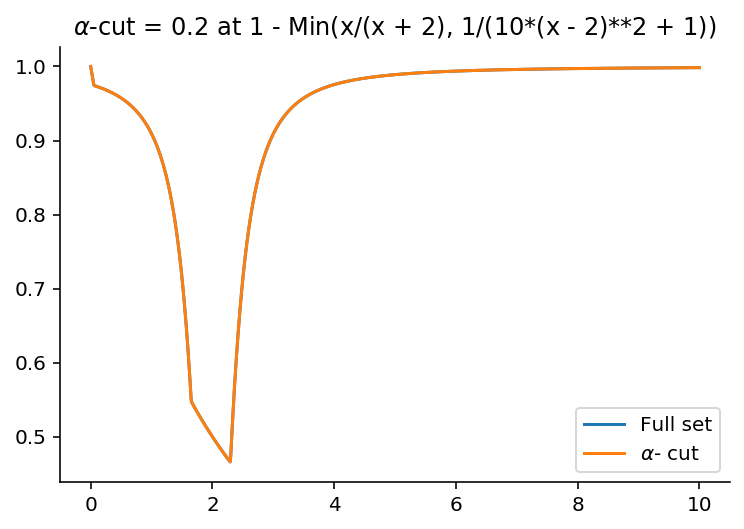

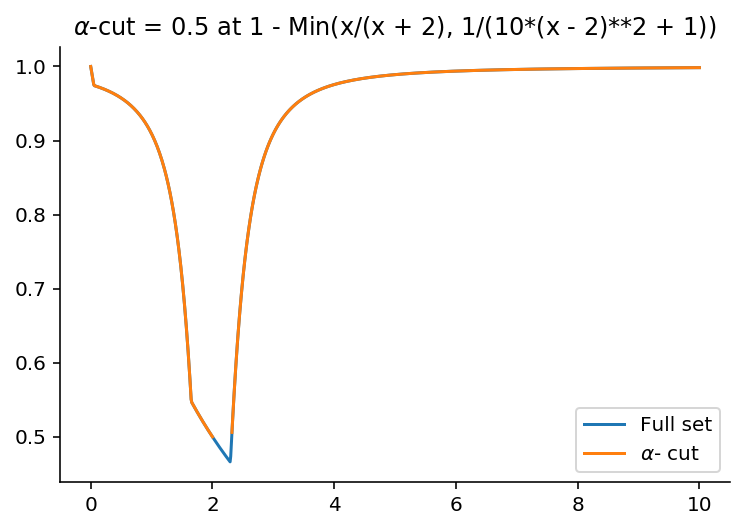

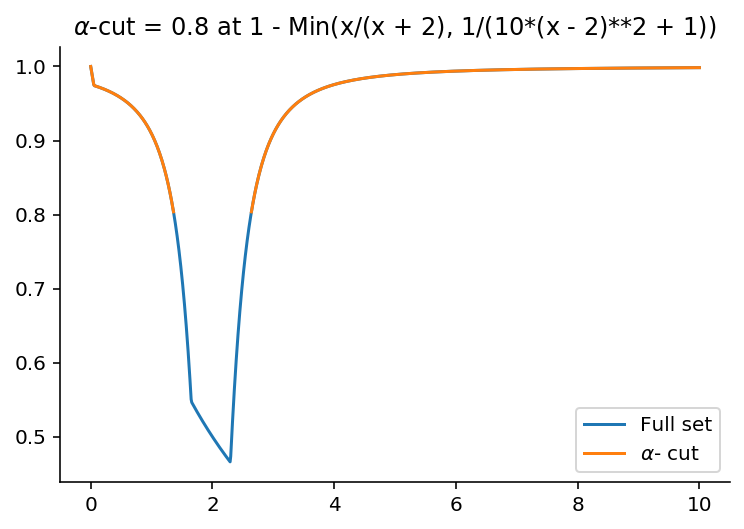

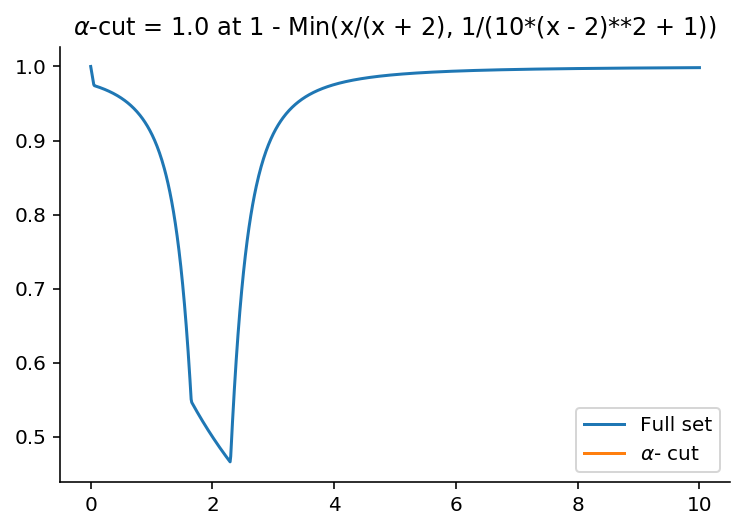

In [11]:
for item in conditions.values():
    for condition in item:
        for alpha in alphas:
            cuts(condition=condition, alpha=alpha)

### Tipping problem

Extracted from [scikit-fuzzy](https://pythonhosted.org/scikit-fuzzy/auto_examples/plot_tipping_problem_newapi.html).

We would formulate this problem as:

#### Antecednets (Inputs)
- service
    
    + Universe (ie, crisp value range): How good was the service of the wait staff, on a scale of 0 to 10?
    + Fuzzy set (ie, fuzzy value range): poor, acceptable, amazing
- food quality
    + Universe: How tasty was the food, on a scale of 0 to 10?
    + Fuzzy set: bad, decent, great

#### Consequents (Outputs)
- tip
    + Universe: How much should we tip, on a scale of 0% to 25%
    + Fuzzy set: low, medium, high

#### Rules
- IF the service was good or the food quality was good, THEN the tip will be high.
- IF the service was average, THEN the tip will be medium.
- IF the service was poor and the food quality was poor THEN the tip will be low.

In [18]:
# Antecedent
service = ctrl.Antecedent(
    universe=np.arange(0,11,1), # Rank 1 to 10
    label='Service quality'
)
food = ctrl.Antecedent(
    universe=np.arange(0,11,1), # Rank 1 to 10. ATTENTION: Must be arange, not linspace!
    label='Food quality'
)

# Consequent
tip = ctrl.Consequent(
    universe=np.arange(0,26,1), # % tip
    label="Tip %"
)

# Fuzzy sets
service.automf( # Automatically populate the universe with membership functions.
    3,
    variable_type = "quality", # The higher the better
    names = ['poor', 'acceptable', 'amazing'],
    invert = False
)

food.automf( # Automatically populate the universe with membership functions.
    3,
    variable_type = "quality", # The higher the better
    names = ['bad', 'decent', 'great'],
    invert = False
)

# Custom membership functions can be built interactively with a familiar,
# Pythonic API
tip['low'] = fuzz.trimf(tip.universe, [0, 0, 13])
tip['medium'] = fuzz.trimf(tip.universe, [0, 13, 25])
tip['high'] = fuzz.trimf(tip.universe, [13, 25, 25])

# Rules

rule1 = ctrl.Rule(
    service['poor'] | food['bad'], # Conditions
    tip['low'] # Result
)
rule2 = ctrl.Rule(service['acceptable'], tip['medium'])
rule3 = ctrl.Rule(service['amazing'] | food['great'], tip['high'])

In [19]:
# Computing
def computation(service, food):
    tipping_ctrl = ctrl.ControlSystem(rules = [rule1, rule2, rule3])
    tipping = ctrl.ControlSystemSimulation(tipping_ctrl)

    
    tipping.input['Service quality'] = service # Must be labels defined before
    tipping.input['Food quality'] = food
    tipping.compute()
    
    print(f"Tipping should be {tipping.output['Tip %']}%")
    tip.view(sim=tipping)

Tipping should be 14.434092568258142%


/home/gpetrini/.local/lib/python3.6/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


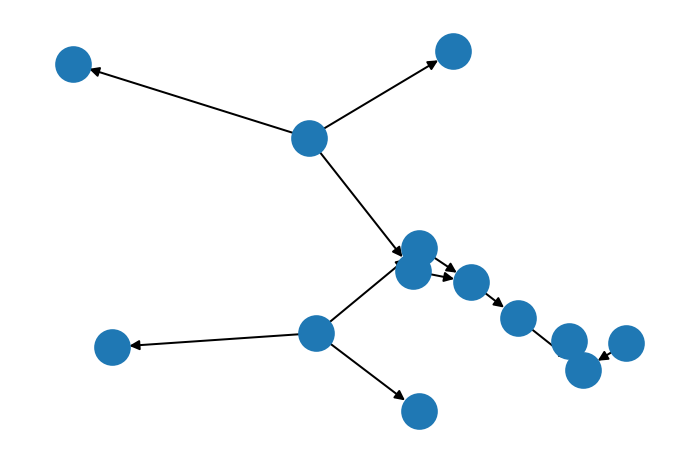

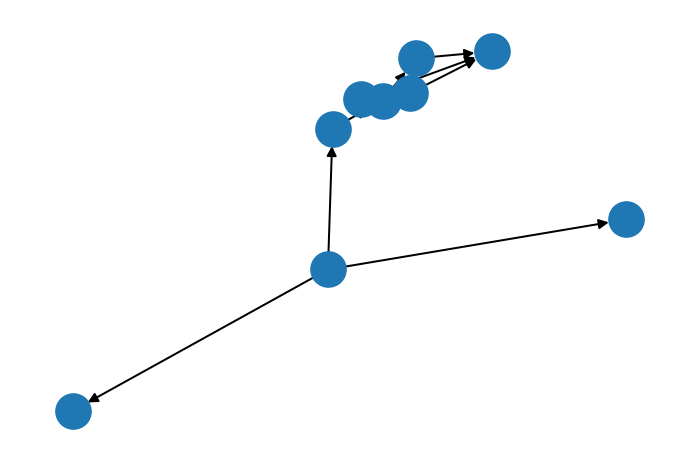

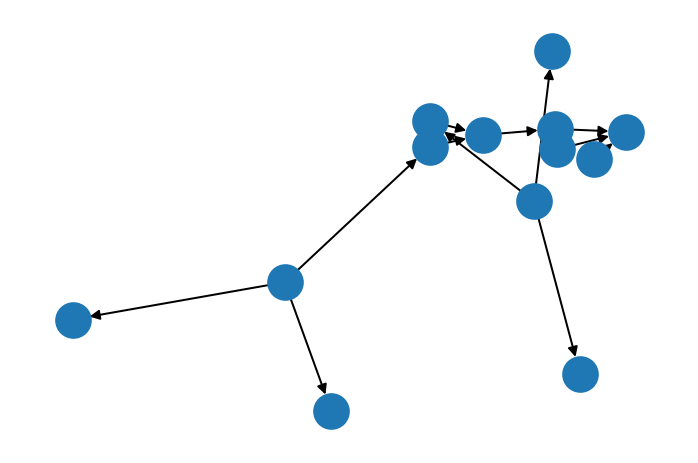

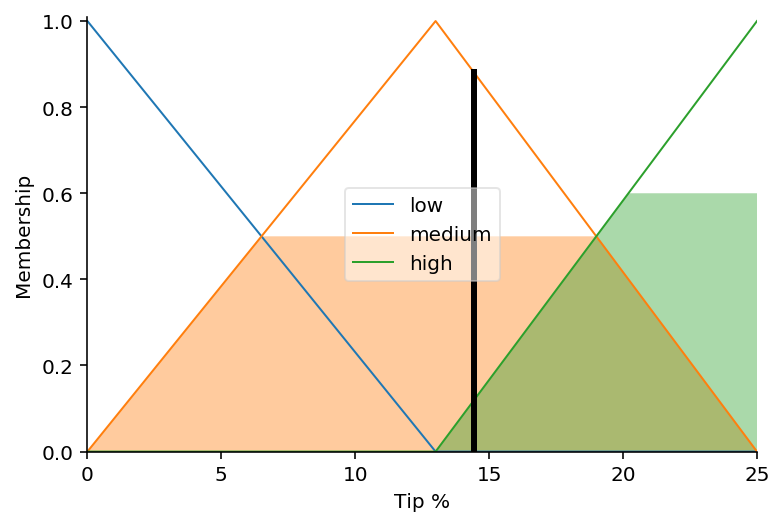

In [21]:
for rule in [rule1, rule2, rule3]:
    rule.view()

computation(7.5,8)